# Mesh subregions

Often we need to define subregions in the mesh. For instance, this can be if when we have two or more different materials in our mesh and it can make our life easier later when start defining fields and assigning different parameters to different subregions.

As before, the region of the mesh we are going to use as an example is:

$$\mathbf{p}_{1} = (0, 0, 0)$$
$$\mathbf{p}_{2} = (l_{x}, l_{y}, l_{z})$$

with $l_{x} = 100 \,\text{nm}$, $l_{y} = 50 \,\text{nm}$, and $l_{z} = 20 \,\text{nm}$, and we discretise it with cell $(5\,\text{nm}, 5\,\text{nm}, 5\,\text{nm})$.

Subregions in the mesh are defined by passing `subregions` attribute. It is a Python dictionary, whose keys are the names of subregions, whereas the values are the subregion objects. Names of subregions must be valid Python variable name strings (no spaces, no dashes, etc.) and the subregions are the region objects we introduced already.

As an example, let us say we have two subregions of the same size, stacked on top of each other in the z-direction. More precisely, points `p1` and `p2` of two subregions would be:

**Subregion 1:**

$\mathbf{p}_{1} = (0, 0, 0)$

$\mathbf{p}_{2} = (l_{x}, l_{y}, l_{z}/2)$

**Subregion 2:**

$\mathbf{p}_{1} = (0, 0, l_{z}/2)$

$\mathbf{p}_{2} = (l_{x}, l_{y}, l_{z})$

Let us name our subregions 1 and 2 to be "bottom_subregion" and "top_subregion". Accordingly, subregions dictionary is:

In [1]:
import discretisedfield as df

lx, ly, lz = 100e-9, 50e-9, 20e-9

subregions = {
    "bottom_region": df.Region(p1=(0, 0, 0), p2=(lx, ly, lz / 2)),
    "top_region": df.Region(p1=(0, 0, lz / 2), p2=(lx, ly, lz)),
}

Having the subregions dictionary, we can now pass it to our mesh:

In [2]:
cell = (5e-9, 5e-9, 5e-9)

region = df.Region(p1=(0, 0, 0), p2=(lx, ly, lz))
mesh = df.Mesh(region=region, cell=cell, subregions=subregions)

The mesh with two subregions is now defined. Please note that it is your responsibility that the subregions are well defined and "make sense". If they overlap or do not cover the entire mesh region, no errors or warnings will be raised. This gives a lot of freedom to users on how they can define the subregions, but also some responsibilities.

In [3]:
mesh

Mesh(Region(pmin=[0.0, 0.0, 0.0], pmax=[1e-07, 5e-08, 2e-08], dims=['x', 'y', 'z'], units=['m', 'm', 'm']), n=[20, 10, 4], subregions: (Region`bottom_region`(pmin=[0.0, 0.0, 0.0], pmax=[1e-07, 5e-08, 1e-08], dims=['x', 'y', 'z'], units=['m', 'm', 'm']), Region`top_region`(pmin=[0.0, 0.0, 1e-08], pmax=[1e-07, 5e-08, 2e-08], dims=['x', 'y', 'z'], units=['m', 'm', 'm'])))

Regarding the mesh operations we can perform, all the ones we showed before are still there, but now we can use subregion-specific ones as well. We can ask for the mesh subregions:

In [4]:
mesh.subregions

{'bottom_region': Region(pmin=[0.0, 0.0, 0.0], pmax=[1e-07, 5e-08, 1e-08], dims=['x', 'y', 'z'], units=['m', 'm', 'm']),
 'top_region': Region(pmin=[0.0, 0.0, 1e-08], pmax=[1e-07, 5e-08, 2e-08], dims=['x', 'y', 'z'], units=['m', 'm', 'm'])}

This is simply a dictionary we used at the mesh definition. From the mesh we can extract a subregion mesh, by "indexing" it with the subregion name.

In [5]:
mesh["bottom_region"]

Mesh(Region(pmin=[0.0, 0.0, 0.0], pmax=[1e-07, 5e-08, 1e-08], dims=['x', 'y', 'z'], units=['m', 'm', 'm']), n=[20, 10, 2])

This returns a mesh defined on a subregion and with the same cell size we used at the mesh definition. So, we expect that one half of the total number of cells belong to each subregion:

In [6]:
len(mesh)  # total number of cells

800

In [7]:
len(mesh["bottom_region"])  # number of cells in the bottom_region

400

In [8]:
len(mesh["bottom_region"])  # number of cells in the top_region

400

The object indexing operator returns is a mesh and we can perform all the typical mesh operations on it. For example, let us say we want to get the centre point of the `bottom_region`. First we need to extract the subregion (`[]`), then access its region (`.region`) and finally ask for its centre point (`.centre`):

In [9]:
mesh["bottom_region"].region.centre

array([5.0e-08, 2.5e-08, 5.0e-09])

## Mesh subregions visualisation

Similar to region and mesh, subregions can be plotted either using `matplotlib` (`mpl_subregions`) or `k3d` (`k3d_subregions`).

### `mpl`

Defaults `matplotlib` plot is:

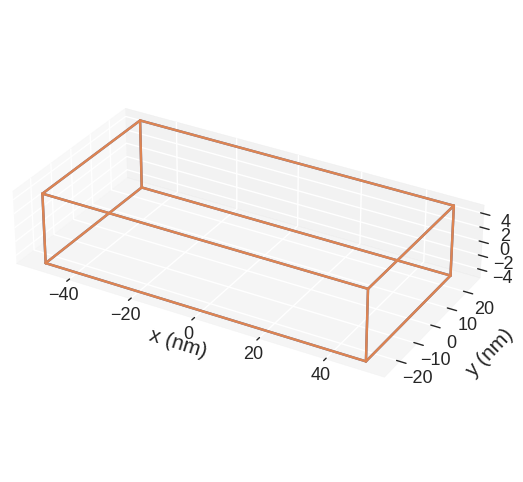

In [10]:
mesh.mpl.subregions()

If we want to change the figure size, we can pass `figsize` parameter. Its value must be a lenth-2 tuple, with the first element being the size in the horizontal direction, whereas the second element is the size in the vertical direction.

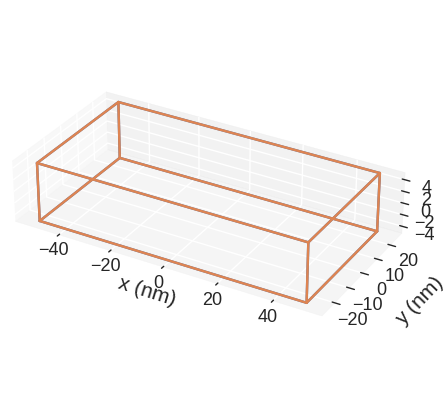

In [11]:
mesh.mpl.subregions(figsize=(10, 5))

The color of the lines depicting subregions we can choose by passing `color` argument. `color` must be an array-like which consists of valid `matplotlib` colours. Elements of the array-like can be RGB hex-strings ([online converter](http://www.javascripter.net/faq/rgbtohex.htm)). If the number of colours in `color` is smaller than the number of subregions, the values of `color` will be used in cycle.

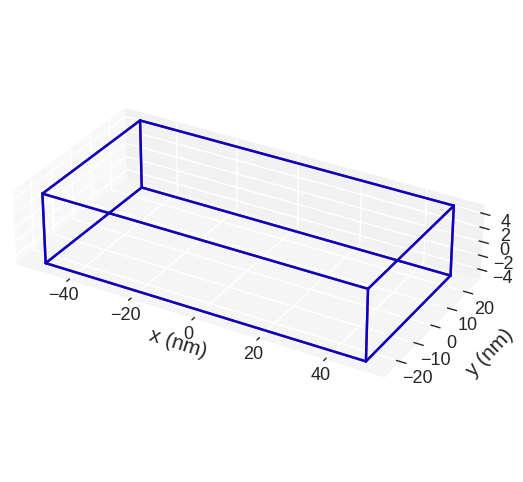

In [12]:
mesh.mpl.subregions(color=("#f33f00", "#0000cf"))

`discretisedfield` automatically chooses the SI prefix (nano, micro, etc.) it is going to use to divide the axes with and show those units on the axes. Sometimes (e.g. for thin films), `discretisedfield` does not choose the SI prefix we expected. In those cases, we can explicitly pass it using `multiplier` argument. ``multiplier`` can be passed as $10^{n}$, where $n$ is a multiple of 3 (..., -6, -3, 0, 3, 6,...). For instance, if `multiplier=1e-6` is passed, all axes will be divided by $1\,\mu\text{m}$ and $\mu\text{m}$ units will be used as axis labels.

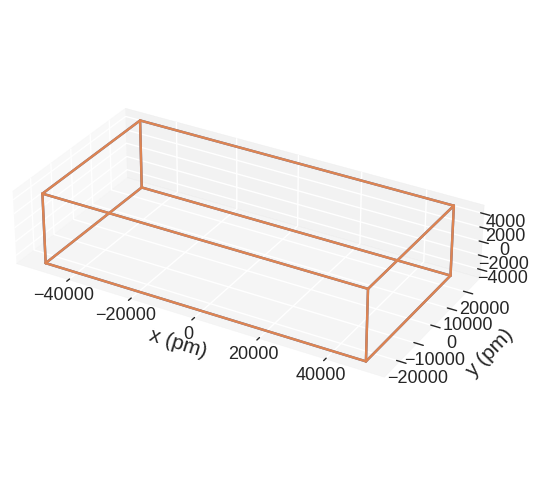

In [13]:
mesh.mpl.subregions(multiplier=1e-12)

If we want to save the plot, we pass `filename`, mesh plot is going to be shown and the plot saved in our working directory as a PDF.

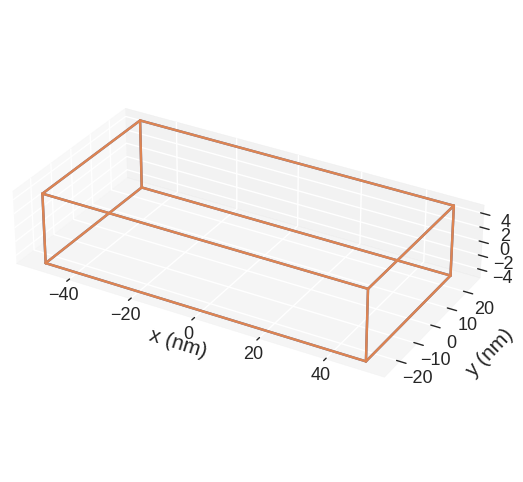

In [14]:
mesh.mpl.subregions(filename="my-subregions-plot.pdf")

`mpl` subregions plot is based on [`matplotlib.pyplot.plot` function](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html). Therefore, any parameter accepted by it can be passed. For instance:

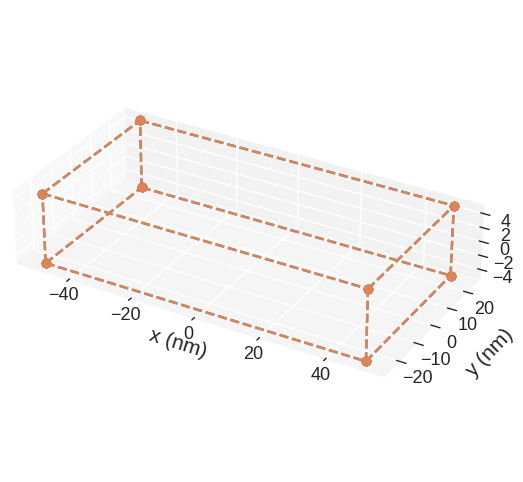

In [15]:
mesh.mpl.subregions(marker="o", linestyle="dashed")

Finally, we show how to expose the axes on which the subregions are plotted, so that we can customise them. We do that by creating the axes ourselves and then passing them to `mpl` function.

Text(0.5, 0, 'height')

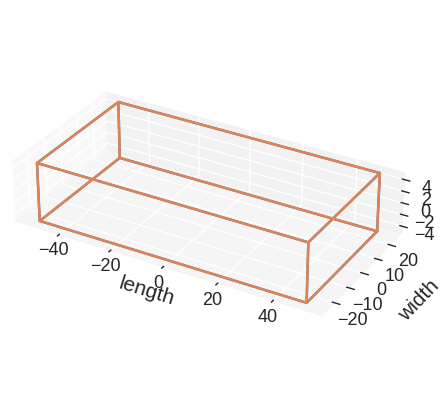

In [16]:
import matplotlib.pyplot as plt

# Create the axes
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection="3d")

# Add the region to the axes
mesh.mpl.subregions(ax=ax)

# Customise the axes
ax.set_xlabel("length")
ax.set_ylabel("width")
ax.set_zlabel("height")

This way, by exposing the axes and passing any allowed `matplotlib.pyplot.plot` argument, we can customise the plot any way we like (as long as it is allowed by `matplotlib`).

Sometimes it is not necessary to define subregions that alltogether cover the whole mesh. Then, it can be usefull to also show the whole region to better visualise the arangement of subregions. This can be done by specifying ``show_region=True``. Customisation of the visualisation of the whole region is currently not supported.

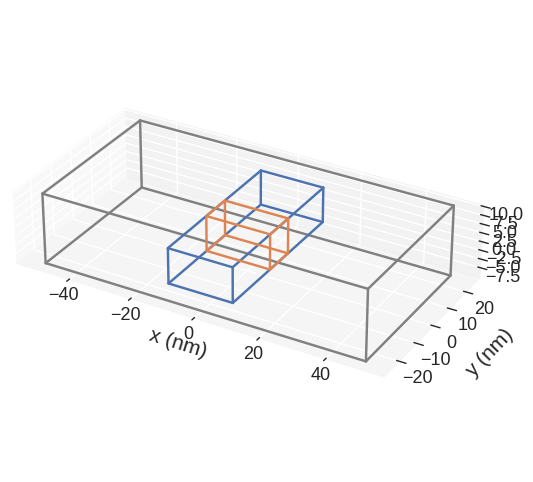

In [17]:
lx, ly, lz = 100e-9, 50e-9, 20e-9

subregions = {
    "bottom_subregion": df.Region(p1=(20e-9, 0, 0), p2=(40e-9, 50e-9, 10e-9)),
    "top_subregion": df.Region(p1=(80e-9, 40e-9, lz / 2), p2=(lx, ly, lz)),
}

cell = (5e-9, 5e-9, 5e-9)

region = df.Region(p1=(0, 0, 0), p2=(lx, ly, lz))
mesh = df.Mesh(region=region, cell=cell, subregions=subregions)

mesh.mpl.subregions(show_region=True)

### `k3d`

Default k3d plot is:

In [18]:
# NBVAL_IGNORE_OUTPUT
mesh.k3d.subregions()

Output()

The colour of subregions we can change by passing `color` argument. `color` must be a list which consists of valid `int` colours. If the number of colours in `color` is smaller than the number of subregions, the values of `color` will be used in cycle.

In [19]:
# NBVAL_IGNORE_OUTPUT
mesh.k3d.subregions(color=["12345", "54321"])

Output()

Similar to the `mpl` plot, we can change the axes multiplier.

In [20]:
# NBVAL_IGNORE_OUTPUT
mesh.k3d.subregions(multiplier=1e-6)

Output()

`k3d` plot is based on [k3d.voxels](https://k3d-jupyter.org/k3d.html#k3d.factory.voxels), so any parameter accepted by it can be passed. For instance:

In [21]:
# NBVAL_IGNORE_OUTPUT
mesh.k3d.subregions(wireframe=True)

Output()

We can also expose `k3d.Plot` object and customise it.

In [22]:
# NBVAL_IGNORE_OUTPUT
import k3d

# Expose plot object
plot = k3d.plot()
plot.display()

# Add region to the plot
mesh.k3d.subregions(plot=plot)

# Customise the plot
plot.axes = [r"\text{length}", r"\text{width}", r"\text{height}"]

Output()

This way, we can modify the plot however we want (as long as `k3d` allows it).